In [1]:
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import pandas as pd
import torch.nn.functional as F

from timeit import default_timer as timer

import ipynb.fs.full.MyDataset as MyDataset
import ipynb.fs.full.Models as Models
import ipynb.fs.full.Utils as Utils
import ipynb.fs.full.RMSELoss as RMSELoss


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])



image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        #transforms.Resize(size=400),
        #transforms.RandomRotation(degrees=2),
        #transforms.ColorJitter(),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

transform = image_transforms["train"]


def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    


pre_resized=True
if pre_resized:
    csv_file = "data/Ch2_002_resized/interpolated.csv"
    directory = "data/Ch2_002_resized"
else:
    csv_file = "data/Ch2_002/interpolated.csv"
    directory = "data/Ch2_002"

    
    
 

dataset = MyDataset.MyDataset(csv_file, directory, transform = transform, enable_cache=False)


a,b,c = int(0.5*len(dataset)),int(0.25*len(dataset)),int(0.25*len(dataset))
m = len(dataset) - (a+b+c)



train_set, val_set, test_set = torch.utils.data.random_split(dataset, [a+m,b,c])
trainloader = DataLoader(train_set, batch_size=64, shuffle=True, pin_memory=True, num_workers=8)
valloader = DataLoader(val_set, batch_size=64, shuffle=True, pin_memory=True, num_workers=8)
testloader = DataLoader(test_set, batch_size=64, shuffle=True, pin_memory=True, num_workers=8)

dataloaders = {
    "train": trainloader,
    "validation": valloader,
    "test": testloader
}
print(len(train_set))
print(len(val_set))

14561
7280


In [3]:
model = Models.ConvNetCustom()
model_data_file = "save_model/cusyom.pt"

In [4]:
#torch.save(model.state_dict(), "save_model/cusyom.pt")
model.load_state_dict(torch.load(model_data_file))

<All keys matched successfully>

In [6]:
use_cuda = torch.cuda.is_available()
print("Gpu:",use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

 
if use_cuda:
    model.cuda()
    model.to(device)



Gpu: True


In [7]:
criterion = RMSELoss.RMSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.7)

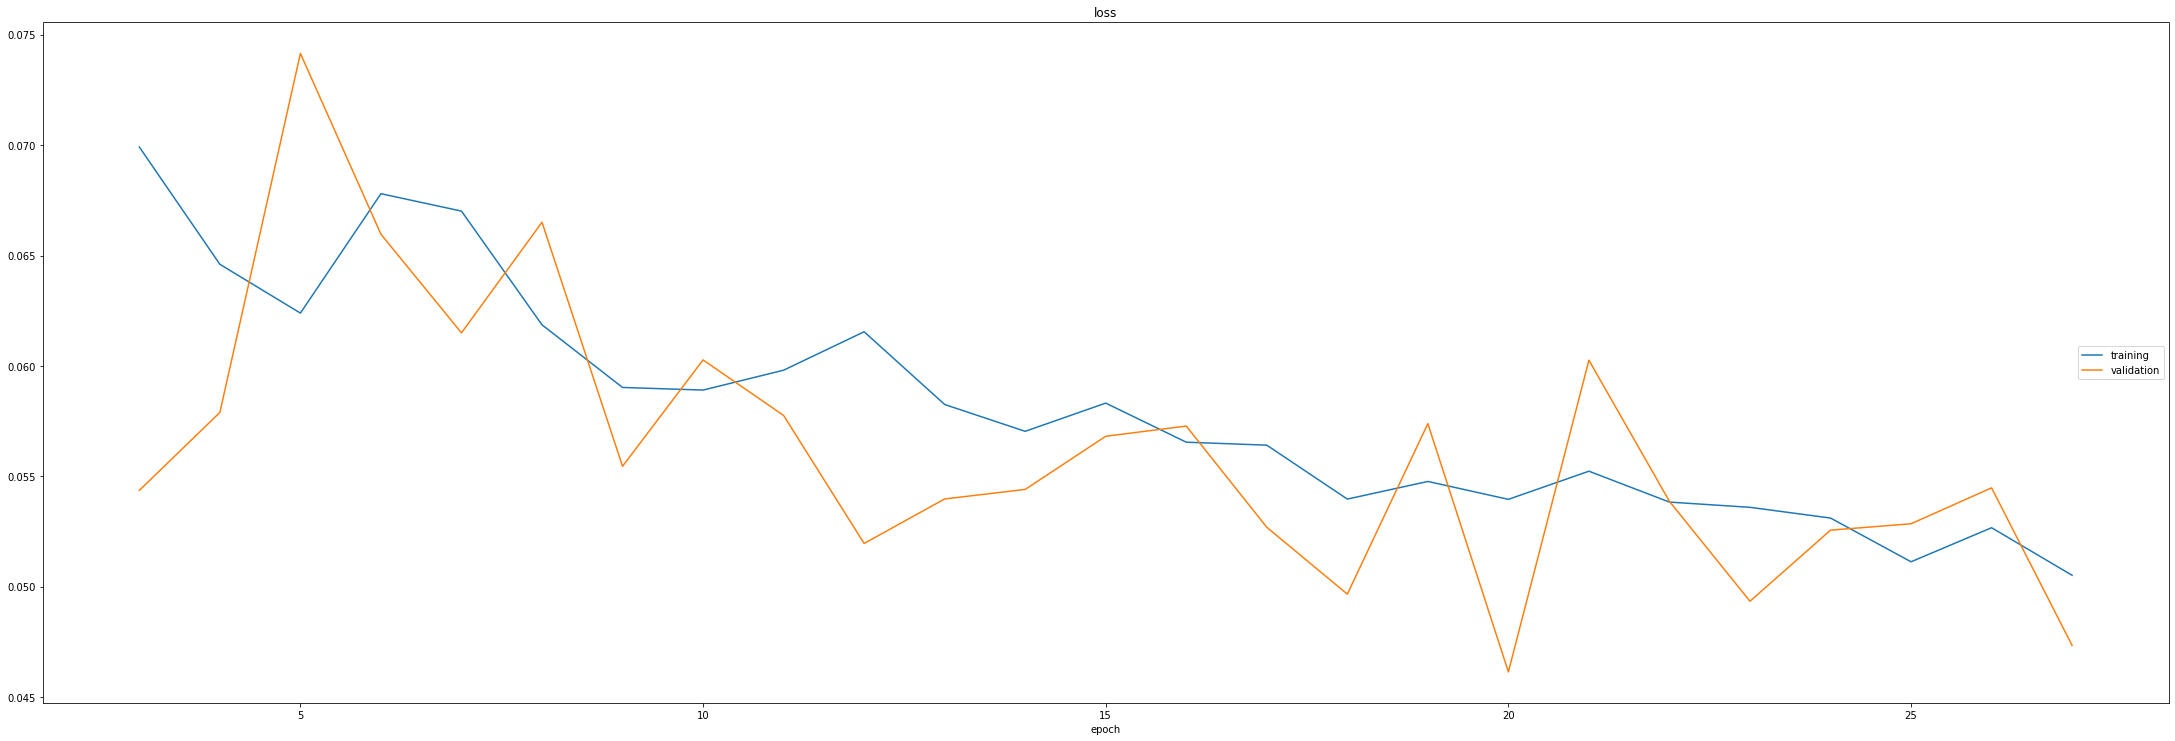

loss:
training   (min:    0.051, max:    0.079, cur:    0.051)
validation (min:    0.046, max:    0.074, cur:    0.047)


KeyboardInterrupt: 

In [8]:
Models.train_model(model, criterion, dataloaders, optimizer, num_epochs=680, cache=False, hard_debug=False, save="save_model/cusyom_2.pt")


In [1]:
torch.save(model.state_dict(), model_data_file)

NameError: name 'torch' is not defined

In [9]:

#model.load_state_dict(torch.load(model_data_file))

use_cuda = torch.cuda.is_available()
print("Gpu:",use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

 
if use_cuda:
    model.cuda()
    model.to(device)
    
model.eval()

Gpu: True


ConvNetCustom(
  (conv1_p): Conv2d(3, 12, kernel_size=(12, 12), stride=(1, 1), padding=(5, 5))
  (bnm1_p): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_p): Conv2d(12, 32, kernel_size=(8, 8), stride=(1, 1), padding=(2, 2))
  (bnm2_p): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3_p): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1), padding=(2, 2))
  (bnm3_p): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1_p): Linear(in_features=6144, out_features=512, bias=True)
  (dropout1_p): Dropout(p=0.6, inplace=False)
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (bnm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 8, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (bnm2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(8, 16, kernel_

In [10]:
Models.test_model(model, criterion, dataloaders)

Test Loss: tensor(0.0504, device='cuda:0')
